# Lecture 3

[Frank Cichos](mailto:cichos@physik.uni-leipzig.de) (2018,2019,2020)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 16,
                     'axes.titlesize': 16,
                     'axes.labelsize': 14,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 14,
                     'ytick.labelsize' : 14,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Light Scattering from a Two Level System - Part 2

During the last lecture we have already obtained a set of differential equations, which tell us about the time-development of the excited and ground state wavefunction amplitudes within out dipole approximation. The results has been this set of two equations, which we still need to solve. 

\begin{equation}
i\hbar\frac{dc_{g}}{dt}=c_{e}\langle g|\hat{d}\cdot \hat{E}|e\rangle e^{-i\omega_{0}t}
\end{equation}

\begin{equation}
i\hbar\frac{dc_{e}}{dt}=c_{g}\langle e|\hat{d}\cdot \hat{E}|g\rangle e^{+i\omega_{0}t}
\end{equation}

Equations 3 and 4 lead us to the definition of a key parameter for atom light interactions. The Rabi frequency

\begin{equation}
\Omega=\frac{E_{0}}{\hbar}\langle e|\hat{d}\cdot \hat{\epsilon}|g\rangle
\end{equation}

describes the strength of the coupling between the atom and the electric field. It increases with increasing intensity, and for a given intensity it is dependent on the atomic states and the polarization through the dipole matrix element.
The coupled equations 3 and 4 can now be written as

\begin{equation}
i\hbar\frac{dc_{g}}{dt}=c_{e}\hbar\Omega\left( \frac{e^{i(\omega-\omega_{0})t}+e^{-i(\omega+\omega_{0})t}}{2}\right)
\end{equation}

\begin{equation}
i\hbar\frac{dc_{e}}{dt}=c_{g}\hbar\Omega\left( \frac{e^{i(\omega+\omega_{0})t}+e^{-i(\omega-\omega_{0})t}}{2}\right)
\end{equation}

where we have used the exponential form of $\cos(\omega t)$. Up to this point, the treatment, within the approximation of only two energy levels, has been exact. We now make an important approximation that is known as the *Rotating Wave Approximation*. We assume that terms like $e^{-i(\omega+\omega_{0})t}$ that oscillate at roughly twice the frequency of the driving field can be eliminated, as their time dependence averages out over the much slower timescale of the evolution of the coefficients $c_g$ and $c_e$.


We introduce the other key parameter for atom-light interactions: the detuning $\Delta=\omega-\omega_0$ which, along with the Rabi frequency, will control the time evolution of this system. The two coupled equations can now be written

\begin{equation}
i\hbar\frac{dc_{g}}{dt}=c_{e}\hbar\Omega^{*}\frac{e^{i\Delta t}}{2}
\end{equation}


\begin{equation}
i\hbar\frac{dc_{e}}{dt}=c_{g}\hbar\Omega\frac{e^{-i\Delta t}}{2}
\end{equation}


The easiest way to solve these equations is to differentiate again with respect to $t$ and to substitute the corresponding other first derivative to yield the following pair of (uncoupled) equations for the coefficients:

\begin{equation}
\frac{d^2c_{g}}{dt^{2}}-i\Delta \frac{dc_{g}}{dt}+\frac{\Omega^2}{4}c_{g}=0
\end{equation}

\begin{equation}
\frac{d^2c_{e}}{dt^{2}}+i\Delta \frac{dc_{e}}{dt}+\frac{\Omega^2}{4}c_{e}=0
\end{equation}

### Rabi oscillations

If we assume that at $t=0$, $c_g =1$ and $c_e =0$,then equations 10 and 11 can be solved to give the following expression for the probability to be in the excited state $|c_e(t)|^2$

\begin{equation}
|c_{e}(t)|^{2}=\frac{\Omega^2}{\Omega^{\prime 2}}\sin^{2}\left[\frac{\Omega^{\prime}t}{2} \right] 
\end{equation}

with

\begin{equation}
\Omega^{\prime}=\sqrt{\Omega^{2}+\Delta^{2}} 
\end{equation}

as the generalized Rabi frequency.

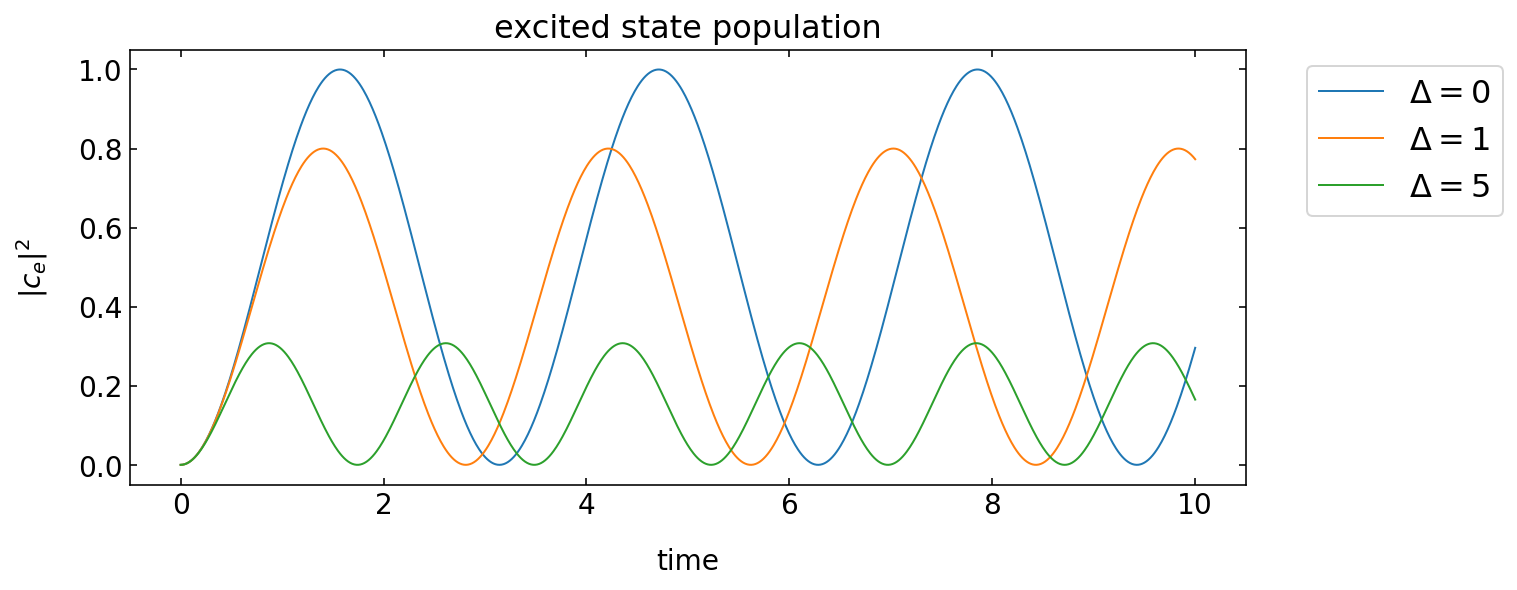

In [3]:
d=1
E=2

Omega=d*E

def c_e(Omega,Delta,t):
    Omega_p=np.sqrt(Omega**2+Delta**2)
    return((np.sin(Omega_p*t/2)**2)*(Omega/Omega_p)**2)

t=np.linspace(0,10,1000)

plt.figure(figsize=(10,4))
plt.plot(t,c_e(Omega,0,t),label='$\Delta=0$')
plt.plot(t,c_e(Omega,1,t),label='$\Delta=1$')
plt.plot(t,c_e(Omega,3,t),label='$\Delta=5$')
plt.xlabel('time')
plt.ylabel('$|c_{e}|^2$')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('excited state population')
plt.show()

Accordingly, the excited state population undergoes oscillations with the Rabi frequency, which is determined by the electric field strength of the incident light. At a detuning of $\Delta=0$ the system can be trnsferred completly into the excited state and back i.e. the excited state population reaches $|c_{e}|^2=1$. In the case of a non-zero detuning. There is still a probability to excite the two level system, only with a lower probability. 
Note also that the frequency of the Rabi oscillation changes 

* with the detuning
* with the laser electric field amplitude (or the intensity)

which can be also shown in experiments such as for Rubidium atoms in a an atomic trap.


![RabiOscillation_Rb.png](RabiOscillation_Rb.png)


Due to this oscillation, the ground state population may be transfered completely to the excited state already after a light pulse of length $T=\pi/\Omega$ if the detuning $\Delta=0$. This is called a **$\pi$-pulse**.

Similarly, the two level system may also be prepared in a coherent superposition state between the ground and the excited state with a **$\pi/2$-pulse**. These two pulses are important for many quantum-optical measurements, i.e. in atomic clocks or photon echo measurements.

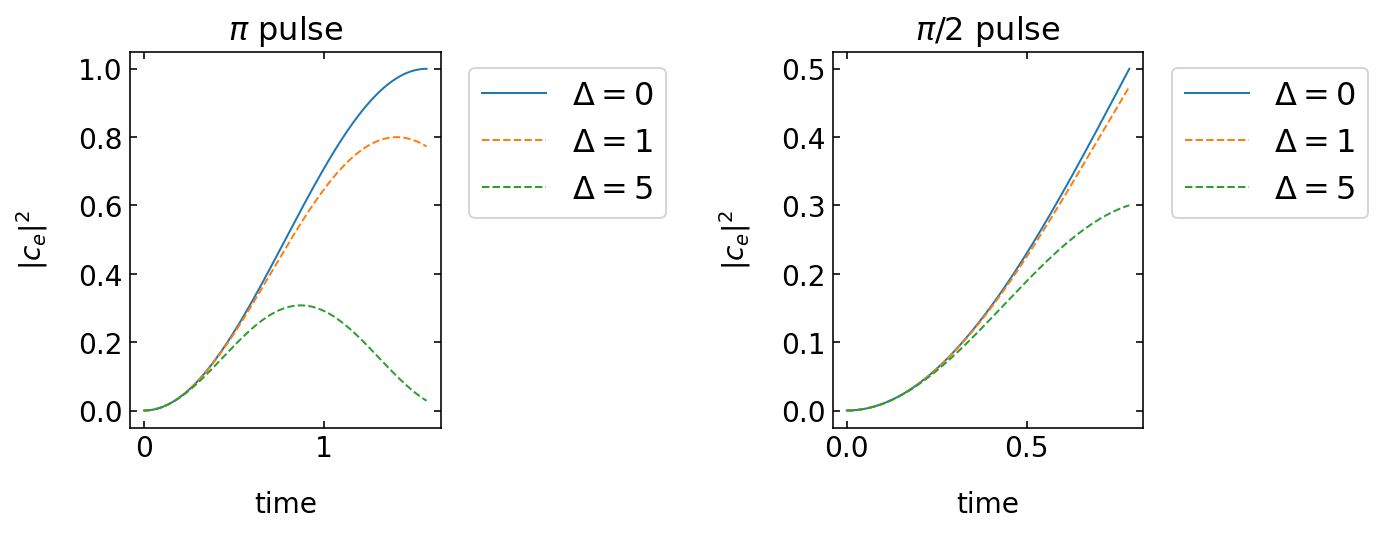

In [4]:
# Plots for a pi and a pi/2 pulse
t=np.linspace(0,np.pi/Omega,1000)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t,c_e(Omega,0,t),label='$\Delta=0$')
plt.plot(t,c_e(Omega,1,t),'--',label='$\Delta=1$')
plt.plot(t,c_e(Omega,3,t),'--',label='$\Delta=5$')
plt.xlabel('time')
plt.ylabel('$|c_{e}|^2$')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('$\pi$ pulse')

t=np.linspace(0,np.pi/Omega/2,1000)
plt.subplot(1,2,2)
plt.plot(t,c_e(Omega,0,t),label='$\Delta=0$')
plt.plot(t,c_e(Omega,1,t),'--',label='$\Delta=1$')
plt.plot(t,c_e(Omega,3,t),'--',label='$\Delta=5$')
plt.xlabel('time')
plt.ylabel('$|c_{e}|^2$')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('$\pi/2$ pulse')
plt.tight_layout()
plt.show()

### Spontaneous emission and the density matrix

In the Schrödinger picture that we have considered thus far, the application of the classical light field causes the atom to oscillate between the ground and excited states. If we think in terms of energy transfer, then the conservation of energy implies that energy must be transferred to and from the monochromatic external light field. The processes that exchange energy with the driving field are known as **absorption and stimulated emission**. In this picture, an atom prepared in the excited state at t = 0 remains in the excited state, unless the external field is present to drive the atom.

In reality, atomic excited states have finite lifetimes. They decay by **spontaneous emission** - the emission of a photon into the empty modes of the electric field surrounding the atom. To describe atom-light interactions properly, we must include this process. Formally, we would need to write a Hamiltonian for our system that includes not only the coupling to the classical external driving field, but also to all the other electric field modes (vacuum fluctuations). To attack the problem in this way requires the techniques of quantum optics, which are beyond the scope of this course.

Instead we consider our atom as an isolated two level atom that is coupled to an environment (all the rest of the electric field). We don’t care about the state of the environment, only about the state of our atom. The coupling between the atom and the environment is irreversible - when the atom spontaneously emits a photon it is "lost". The appearance of this irreversibility is an unavoidable consequence of our partial knowledge of the overall quantum state of the system+environment. The evolution described by the Schrödinger equation is symmetric in time, so we must look beyond this if we are to make progress.


#### Pure and mixed states

The difference between a coherent superposition of states and an incoherent one can be best described on an ensemble of atoms. The state of the whole ensemble shall be described with a wave function. In one case, we prepare the system with a $\pi/2$-pulse, such that each atom is transfered into a coherent superposition state. 

We can measure now each of the atoms and determine their state. Due to the coherent superposition, each measurements give with a 50% chance the ground or the excited state as the result of the measurement. Thus all of the atoms have been initially in the same superposition state. After the measurement we have 50% in the ground and 50% in the excited state. 

If we now do the same measurement with this set of atoms after the first measurement, we still get 50% excited state population and 50% ground state population. The results of both measurements are the same, however, the first setup is using a pure state of all atoms, while the second one is refering to a mixed state. We therefore have to be able to distinguish between such a statistical mixture and a superposition state. This is what is done by the density matrix formalism, which we will shortly sketch below.



#### The density matrix

The density operator for a state is

\begin{equation}
\hat{\rho}=|\Psi\rangle\langle\Psi|
\end{equation}

which is more conveniently written as a matrix - the density matrix, which for our two-level atom is

\begin{equation}
\hat{\rho}=
\begin{pmatrix}
\rho_{gg} & \rho_{ge}  \\
 \rho_{eg} & \rho_{ee} \\
\end{pmatrix}
=
\begin{pmatrix}
c_g c_{g}^{*} & c_g c_{e}^{*}  \\
 c_e c_{g}^{*} & c_e c_{e}^{*} \\
\end{pmatrix}
\end{equation}

Asterisks (∗) denote the complex conjugate. Each element is the product of two probability amplitudes. The diagonal matrix elements are the square of a probability amplitude, and are therefore straightforward to interpret as the probability of finding an atom in a particular state. We have dealt with these amplitudes before in the Schrödinger formalism. 

The off-diagonal matrix elements are called it coherences. To see why this is the case let us consider the expectation value of an operator $\hat{A}$ acting on a state $\Psi\rangle  = c_g|g\rangle+c_e|e\rangle$. One obtains $\langle A \rangle = |c_g|^2 A_{gg} +|c_e|^2 A_{ee}+2 Re(c^{∗}_{g}c_{e}A_{eg})$. The coherences describe the visibility of the interference, or cross-term, which depends on the relative phase between the states $|g\rangle$ and $|e\rangle$. Note the similarity to optics and intereference, as all these are wave phenomena. 

Accordingly a pure state is described by:

\begin{equation}
\hat{\rho}=
\begin{pmatrix}
1/2 & i/2  \\
-i/2 & 1/2 \\
\end{pmatrix}
\end{equation}



while a mixed state will have a density matrix of:

\begin{equation}
\hat{\rho}=
\begin{pmatrix}
1/2 & 0  \\
0 & 1/2 \\
\end{pmatrix}
\end{equation}

#### The time evolution of the density matrix and spontaneous emission

The time evolution of the density matrix is now determined by **Liouville equation:**

\begin{equation}
\frac{d\rho}{dt}=-\frac{i}{\hbar}[\hat{\rho},\hat{H}]
\end{equation}

However, the density matrix formalism also allows us to include processes which can’t be described using a Hamiltonian, which allows us to include the effects of spontaneous emission. If the excited state $|e\rangle$ decays at rate $\Gamma$, then the time evolution of the populations due to spontaneous emission is

\begin{equation}
\frac{d\rho_{ee}}{dt}=-\frac{d\rho_{gg}}{dt}=-\Gamma \rho_{ee}
\end{equation}

The spontaneous emission also acts on the coherences. The effect is less obvious and we will refer here only to the literature (Cohen-Tannoudji, Atom-photon interactions). 

\begin{equation}
\frac{d\rho_{eg}}{dt}=-\frac{\Gamma}{2} \rho_{eg}
\end{equation}

\begin{equation}
\frac{d\rho_{ge}}{dt}=-\frac{\Gamma}{2} \rho_{ge}
\end{equation}

The full equation of motion for the density matrix including the Hamiltonian part due to the interaction with the external electric field and spontaneous emission is therefore 

\begin{equation}
\frac{d\rho}{dt}=-\frac{i}{\hbar}[\hat{\rho},\hat{H}]-
\begin{bmatrix}
-\Gamma \rho_{ee} & \frac{\Gamma}{2}\rho_{ge}  \\
\frac{\Gamma}{2}\rho_{eg} & \Gamma \rho_{ee} \\
\end{bmatrix}
\end{equation}

The effect of spontaneous emission can be observed in the experiment as well, i.e. when driving the atom between the ground state and the excited state with corresponding $\pi$ pulses. The spontaneous emission is a loss of coherence and thus after a driving with $3\pi$ not all pupulation has returned to the excited state. 

![SpontaneousEmission.png](SpontaneousEmission.png)

### The optical Bloch equations

The time evolution of the density matrix can now be calculated from 

\begin{equation}
\frac{d\rho}{dt}=-\frac{i}{\hbar}[\hat{\rho},\hat{H}]-
\begin{bmatrix}
-\Gamma \rho_{ee} & \frac{\Gamma}{2}\rho_{ge}  \\
\frac{\Gamma}{2}\rho_{eg} & \Gamma \rho_{ee} \\
\end{bmatrix}
\end{equation}


using the time independent form of the Hamiltonian 

\begin{equation}
\hat{H}=\frac{\hbar}{2}
\begin{bmatrix}
0 & \Omega  \\
\Omega & -2\Delta \\
\end{bmatrix}
\end{equation}


It results in 4 coupled differential equations 

\begin{eqnarray}
\dot{\tilde{\rho}}_{gg} & = & \frac{i\Omega}{2}(\tilde{\rho}_{eg}-\tilde{\rho}_{ge})+\Gamma\tilde{\rho}_{ee} \\
\dot{\tilde{\rho}}_{ee} & = & -\frac{i\Omega}{2}(\tilde{\rho}_{ge}-\tilde{\rho}_{eg})-\Gamma\tilde{\rho}_{ee}\\
\dot{\tilde{\rho}}_{ge} & = & \frac{i\Omega}{2}(\tilde{\rho}_{ee}-\tilde{\rho}_{gg})-i\Delta \tilde{\rho}_{ge}-\frac{\Gamma}{2}\tilde{\rho}_{ge}\\
\dot{\tilde{\rho}}_{eg} & = & \frac{i\Omega}{2}(\tilde{\rho}_{gg}-\tilde{\rho}_{ee})+i\Delta \tilde{\rho}_{eg}-\frac{\Gamma}{2}\tilde{\rho}_{eg}
\end{eqnarray}


which are known as the *Optical Bloch Equations*. Their solutions have been studied extensively and is possible analytically only for a few special cases. They are equivalent to the Bloch equations describing the dynamics of the magnitization in magnetic resonance. 
In the solution, the elements of the density matrix have to fulfill two constraints:

\begin{equation}
\tilde{\rho}_{gg}+\tilde{\rho}_{ee}=1
\end{equation}

and 

\begin{equation}
\tilde{\rho}_{ge}=\tilde{\rho}_{eg}^{*}
\end{equation}

Therefore only three independent components need to be considered, which resemble to be the components of the **Bloch vector** {$u,v,w$}.


\begin{equation}
u=(\tilde{\rho}_{ge}+\tilde{\rho}_{eg})
\end{equation}

\begin{equation}
v=(\tilde{\rho}_{eg}-\tilde{\rho}_{ge})
\end{equation}

\begin{equation}
w=(\tilde{\rho}_{ee}-\tilde{\rho}_{gg})
\end{equation}

We can attach a physical significance to each of the three terms: 

* $w$ is proportional to the difference in the populations of the ground and excited state
* $u$ and $v$ are respectively proportional to the in phase and quadrature components of the atomic dipole moment

The Bloch vector has a maximum of unit length, and in the absence of spontaneous emission this unit vector defines a point on the Bloch sphere as shown in Fig. 4. The effect of spontaneous emission is to “collapse” the Bloch sphere; the Bloch vector no longer has unit length and the sphere eventually shrinks to a single point as all the atoms end up in the ground state.


![BlochSphere.png](BlochSphere.png)

The time evolution of the Bloch vector can then be obtained from the differential equations above as

\begin{equation}
\frac{d}{dt}
\begin{pmatrix}
u\\
v\\
w
\end{pmatrix}
=
\begin{pmatrix}
\Omega\\
0\\
\Delta
\end{pmatrix}
\times
\begin{pmatrix}
u\\
v\\
w
\end{pmatrix}
-\Gamma
\begin{pmatrix}
u/2\\
v/2\\
w+1
\end{pmatrix}
\end{equation}



A steady state is reached due to 
By setting the time derivatives to zero, we obtain a steady-state solution for constant $\Omega$ with the three Bloch vector components

\begin{equation}
u_{ss}=\frac{\Delta}{\Omega}\frac{S}{1+S}
\end{equation}

\begin{equation}
v_{ss}=\frac{\Gamma}{2\Omega}\frac{S}{1+S}
\end{equation}

\begin{equation}
w_{ss}=\frac{-1}{1+S}
\end{equation}

where we have introduced the saturation parameter $S$

\begin{equation}
S=\frac{\Omega^2/2}{\Delta^2+(\Gamma^2/4) }=\frac{s}{1+4\Delta^2/\Gamma^2}
\end{equation}

with $s=I/I_{sat}$. The saturation intensity $I_{sat}$ is a way of describing the strength of the transition

\begin{equation}
I_{sat}=\frac{2\pi^2\hbar \Gamma c}{3\lambda^3}
\end{equation}

It can be thought of photon energy ($ hc/ \lambda$) per unit lifetime ($1/\Gamma$) and unit area ($\lambda^2$). For alkali metal D lines it is on the order of 1 mW/cm$^2$.



The excited state population is 

\begin{equation}
\tilde{\rho}_{ee}=\frac{1}{2}(1+w_{ss})=\frac{1}{2}\frac{s}{1+s+4\Delta^2/\Gamma^2}
\end{equation}

and has some properties which are different as compared to our previous analysis. There, the application of a constant driving field led to Rabi oscillations, and on resonance, the population could be transferred completely from the ground state to the excited state and back. In the presence of damping, oscillations are no longer observed. Instead the population reaches a steady state. The maximum population of the excited state is $\tilde{\rho}_{ee} = 1/2$, which is attained only asymptotically as the laser intensity is increased. This effect is known as **saturation**.


### Photon Scattering Rate

We can calculate a scattering rate for the atom by multiplying the excited state population with the excited state lifetime and obtain

\begin{equation}
R(I,\Delta)=\Gamma\tilde{\rho}_{ee}=\frac{1}{2}(w_{ss}+1)=\frac{\Gamma}{2}\frac{s}{1+s+4\Delta^2/\Gamma^2}
\end{equation}

This scattering rate has a Lorentzian lineshape with a width $\Gamma^{\prime}=\sqrt{\Gamma^2(1+s)}$. At low intensity, it is set by the natural linewidth $\Gamma$. At higher intensity it becomes *power broadened*.

## Susceptibility of a Two Level System

We are now able to relate the microscopic description to a macroscopic description we are more used to from the electrodynamics

\begin{equation}
\vec{P}=\epsilon_{0}\chi(\omega) \vec{E}=n<\vec{d}> =\frac{1}{2}\epsilon_{0}\vec{E}(\chi e^{-i\omega t}+\chi^{*} e^{i\omega t})
\end{equation}

which connects the polarization density $\vec{P}$ with the electric field $\vec{E}$ via the suceptibility $\chi$.
The calculation of the suceptibility finally results in a real and imaginary part given by

\begin{equation}
\chi_{R}=\frac{2nd_{ge}}{\epsilon_0}u=-\frac{nd_{ge}^2}{\hbar\epsilon_{0}}\frac{\Delta}{\Delta^2+\Gamma^2/4+\Omega^2/2}
\end{equation}


\begin{equation}
\chi_{I}=-\frac{2nd_{ge}}{\epsilon_0}v=\frac{nd_{ge}^2}{\hbar\epsilon_{0}}\frac{\Gamma/2}{\Delta^2+\Gamma^2/4+\Omega^2/2}
\end{equation}

which is very familiar from the theory of classical oscillators. The shape of the real part is dispersive and related to the common real valued refractive index, while the shape of the imaginary part is a Lorentzian providing the absorption of our two level atom.
